### Student Information
Name: 李呂元

Student ID: 112062677

GitHub ID: 108062134

Kaggle name: Lewis Lee

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part I

In [2]:
### Begin Assignment Here
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

## Exercise 1

In [4]:
# Answer here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(train_df["text"]) 
X_train_counts = np.array(X_train_counts.sum(axis=0)).flatten()
df_train = pd.DataFrame({
    'word': count_vect.get_feature_names_out(),
    'Frequency': X_train_counts
})
df_train = df_train.sort_values(by='Frequency',ascending=False).head(30)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Training Set", "Test Set"))
fig.add_trace(
    go.Bar(x=df_train['word'], y=df_train['Frequency']),
    row=1, col=1
)


X_test_counts = count_vect.fit_transform(test_df["text"]) 
X_test_counts = np.array(X_test_counts.sum(axis=0)).flatten()

df_test = pd.DataFrame({
    'word': count_vect.get_feature_names_out(),
    'Frequency': X_test_counts
})
df_test = df_test.sort_values(by='Frequency',ascending=False).head(30)
fig.add_trace(
    go.Bar(x=df_test['word'], y=df_test['Frequency']),
    row=1, col=2
)
fig.update_layout(title_text="Top 30 Term Frequencies", showlegend=False)
fig.update_xaxes(title_text="Term", tickangle=-45)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.show()

In [5]:
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## Exercise 2

In [6]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["text"]).toarray()

selected_features = tfidf_vectorizer.get_feature_names_out()[100:110]

print(selected_features)

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


## Exercies 3

In [ ]:
# Answer here
# model tends to confuse between fear and anger, and it perform well on fear class however bad on sadness.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

## Exercise 4

c:\Users\fjric\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



training accuracy: 0.76
testing accuracy: 0.65
              precision    recall  f1-score   support

           0       0.53      0.73      0.61        84
           1       0.79      0.59      0.68       110
           2       0.65      0.81      0.72        79
           3       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



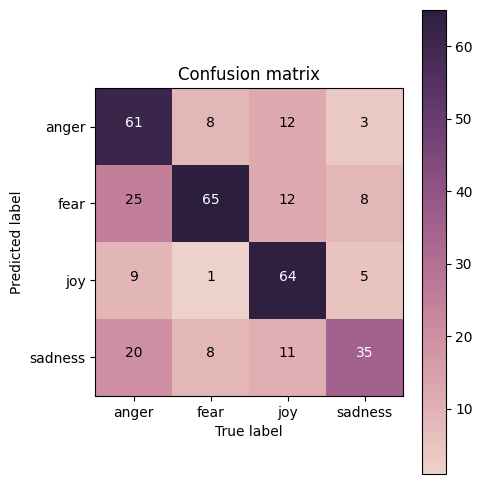

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

label_encoder = LabelEncoder()


# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

y_train = label_encoder.fit_transform(y_train.astype(str))
y_test = label_encoder.transform(y_test.astype(str))


X_train = X_train.toarray()
X_test = X_test.toarray()

NB_model = GaussianNB()

NB_model.fit(X_train, y_train)

y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Exercise 5

In [ ]:
# Answer here
# decision tree outperform Naive Bayes on both training and testing set
# In decision tree, model get confused on class anger and fear.
# In Naive Bayes, model get confused on class anger, fear and sadness.
# I think Naive Bayes doesn't perferom well because Naive Bayes assumes features are indepentent; however, it's obvious not
# true when dealing with text features. 

## Bonus

Training Accuracy (Random Forest): 0.84
Testing Accuracy (Random Forest): 0.67
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        84
           1       0.69      0.75      0.72       110
           2       0.69      0.62      0.65        79
           3       0.61      0.62      0.61        74

    accuracy                           0.67       347
   macro avg       0.67      0.66      0.66       347
weighted avg       0.67      0.67      0.67       347



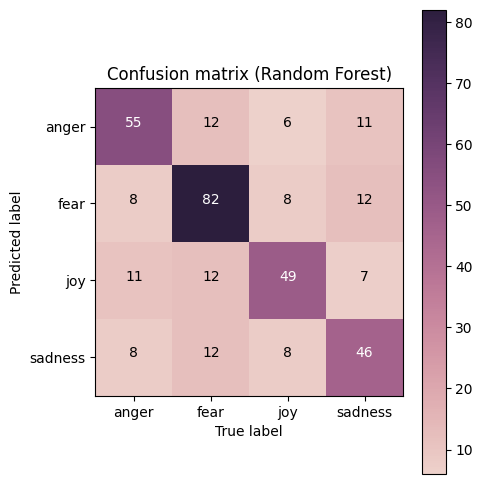

In [11]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

early_stopping = lgb.early_stopping(20)
lgb_model = LGBMClassifier(
    n_estimators=800,
    random_state=1,
    learning_rate=0.008,
    reg_alpha=1,
    reg_lambda=1,
    max_depth=50,
    feature_fraction= 0.4,
    min_gain_to_split=0.01,
    n_jobs=4,
    call_back=[early_stopping],
    verbose = -1
)

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.astype(str))
y_test_encoded = label_encoder.transform(y_test.astype(str))

X_train_dense = pd.DataFrame(X_train.toarray(), columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_test_dense = pd.DataFrame(X_test.toarray(), columns=[f'feature_{i}' for i in range(X_test.shape[1])])

# 將新的列 intensity 合併到 DataFrame
X_train_dense = pd.concat([X_train_dense, train_df["intensity"].reset_index(drop=True)], axis=1)
X_test_dense = pd.concat([X_test_dense, test_df["intensity"].reset_index(drop=True)], axis=1)

lgb_model.fit(X_train_dense, y_train_encoded)

y_train_pred_RF = lgb_model.predict(X_train_dense)
y_test_pred_RF = lgb_model.predict(X_test_dense)

acc_train_RF = accuracy_score(y_true=y_train_encoded, y_pred=y_train_pred_RF)
acc_test_RF = accuracy_score(y_true=y_test_encoded, y_pred=y_test_pred_RF)

print('Training Accuracy (Random Forest): {:.2f}'.format(acc_train_RF))
print('Testing Accuracy (Random Forest): {:.2f}'.format(acc_test_RF))

print(classification_report(y_true=y_test_encoded, y_pred=y_test_pred_RF))

cm_RF = confusion_matrix(y_true=y_test_encoded, y_pred=y_test_pred_RF) 
plot_confusion_matrix(cm_RF, classes=label_encoder.classes_, title='Confusion matrix (Random Forest)')

Training Accuracy (Word2Vec): 0.70
Testing Accuracy (Word2Vec): 0.28
              precision    recall  f1-score   support

       anger       0.28      0.24      0.26        84
        fear       0.31      0.55      0.40       110
         joy       0.20      0.05      0.08        79
     sadness       0.19      0.16      0.18        74

    accuracy                           0.28       347
   macro avg       0.25      0.25      0.23       347
weighted avg       0.25      0.28      0.25       347



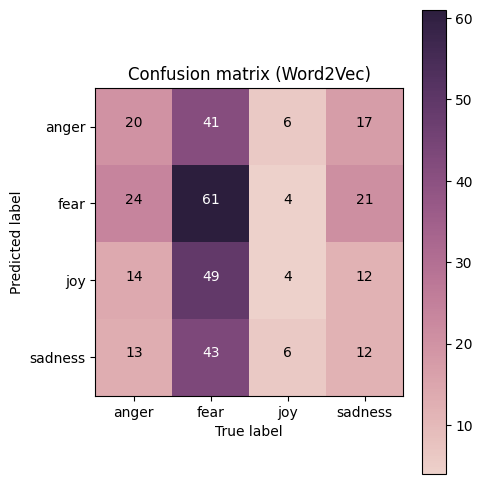

In [12]:
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

n = 12
# Define the Word2Vec model
word2vec_model = Word2Vec(sentences=[text.split() for text in train_df['text']], vector_size=n, window=5, min_count=1, workers=4
                          )

# Function to generate text vectors
def generate_text_vectors(texts):
    return np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv], axis=0) if text.split() and any(word in word2vec_model.wv for word in text.split()) else np.zeros(n) for text in texts])

# Define the pipeline
word2vec_pipeline = Pipeline([
    ('word2vec', FunctionTransformer(func=generate_text_vectors, validate=False, accept_sparse=True)),
    ('lgb', LGBMClassifier(n_estimators=300, random_state=1, learning_rate=0.01, feature_fraction=0.4, 
                           verbose = -1,min_gain_to_split=0.01, n_jobs=4))
])

# Train the model
word2vec_pipeline.fit(train_df['text'], train_df['emotion'])

# Make predictions
y_train_pred_word2vec = word2vec_pipeline.predict(train_df['text'])
y_test_pred_word2vec = word2vec_pipeline.predict(test_df['text'])

# Evaluate the model
acc_train_word2vec = accuracy_score(y_true=train_df['emotion'], y_pred=y_train_pred_word2vec)
acc_test_word2vec = accuracy_score(y_true=test_df['emotion'], y_pred=y_test_pred_word2vec)

print('Training Accuracy (Word2Vec): {:.2f}'.format(acc_train_word2vec))
print('Testing Accuracy (Word2Vec): {:.2f}'.format(acc_test_word2vec))

print(classification_report(y_true=test_df['emotion'], y_pred=y_test_pred_word2vec))

cm_word2vec = confusion_matrix(y_true=test_df['emotion'], y_pred=y_test_pred_word2vec)
plot_confusion_matrix(cm_word2vec, classes=label_encoder.classes_, title='Confusion matrix (Word2Vec)')


Training Accuracy (Random Forest): 0.98
Testing Accuracy (Random Forest): 0.57
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        84
           1       0.56      0.76      0.65       110
           2       0.55      0.46      0.50        79
           3       0.55      0.43      0.48        74

    accuracy                           0.57       347
   macro avg       0.57      0.55      0.55       347
weighted avg       0.57      0.57      0.56       347



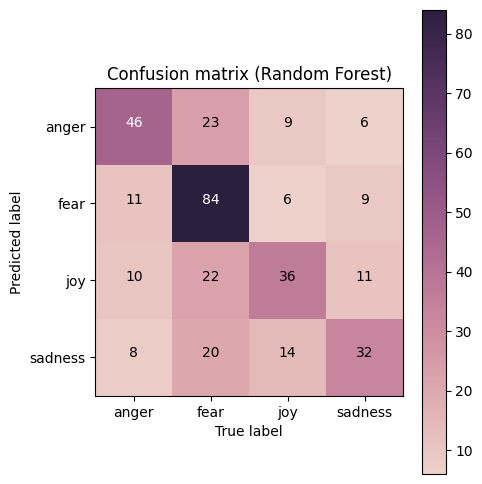

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

pca = PCA(n_components=300)
lgb_model = LGBMClassifier(
    n_estimators=300,
    random_state=1,
    max_depth=32,
    learning_rate=0.02,
    #colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=3,
    feature_fraction= 0.4,
    min_gain_to_split=0.01,
    n_jobs=4,
    verbose=-1
)
pipeline = Pipeline([('pca', pca), ('lgb', lgb_model)])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.astype(str))
y_test_encoded = label_encoder.transform(y_test.astype(str))

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

pipeline.fit(X_train_dense, y_train_encoded)

y_train_pred_RF = pipeline.predict(X_train_dense)
y_test_pred_RF = pipeline.predict(X_test_dense)

acc_train_RF = accuracy_score(y_true=y_train_encoded, y_pred=y_train_pred_RF)
acc_test_RF = accuracy_score(y_true=y_test_encoded, y_pred=y_test_pred_RF)

print('Training Accuracy (Random Forest): {:.2f}'.format(acc_train_RF))
print('Testing Accuracy (Random Forest): {:.2f}'.format(acc_test_RF))

print(classification_report(y_true=y_test_encoded, y_pred=y_test_pred_RF))

cm_RF = confusion_matrix(y_true=y_test_encoded, y_pred=y_test_pred_RF) 
plot_confusion_matrix(cm_RF, classes=label_encoder.classes_, title='Confusion matrix (Random Forest)')

In [22]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))


Epoch 1/25
113/113 [==============================] - 1s 2ms/step - loss: 1.3356 - accuracy: 0.3579 - val_loss: 1.2836 - val_accuracy: 0.4352
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 1.0197 - accuracy: 0.6120 - val_loss: 0.9527 - val_accuracy: 0.6254
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7852 - val_loss: 0.7951 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8492 - val_loss: 0.7867 - val_accuracy: 0.7032
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8824 - val_loss: 0.8328 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9087 - val_loss: 0.8961 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9258 - val_loss: 0.9660 - val_accuracy: 0.6916
Epoch 

## Exercise 6

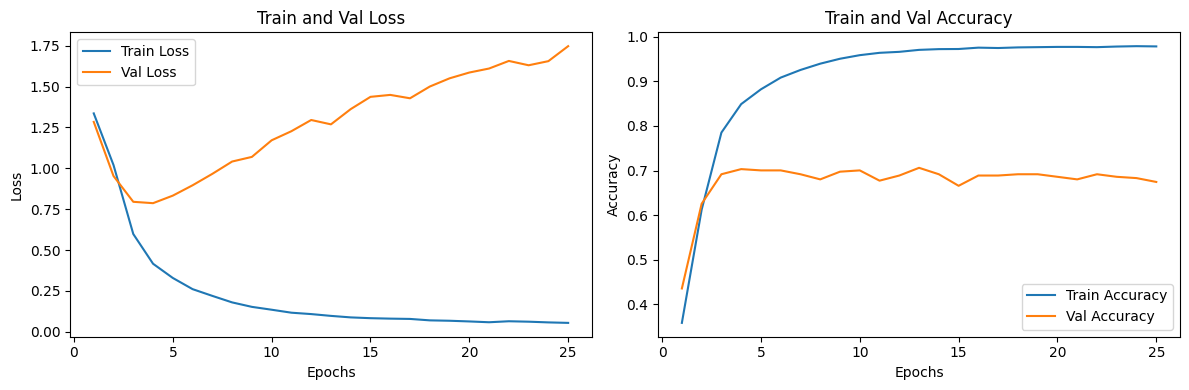

In [23]:
# Answer here
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# it's obvious that as our epoch grows our training loss keep dropping but our val loss keep growing after 4 epoch
# And there's the same situation in accuracy, training accuracy improve as epoch grows but val accuracy stuck at 0.7 after 4 epoch
# Thus, it's an overfitting situation after around 4 epoch

## Exercise 7

In [ ]:
# Answer here
# we can average these word vecors and get sentence vector or apply TF-IDF to set weights for each word vectors
# Then, we apply these weight to sum up and get average of word vectors.

## Exercise 8

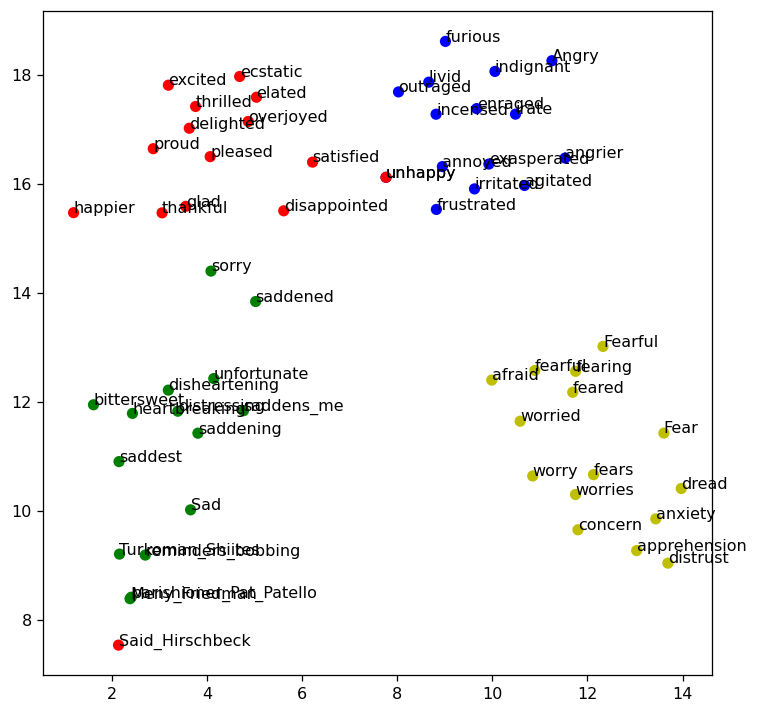

In [25]:
# Answer here
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

top_15 = []
target_words = []
color = []
for i in ["angry","happy","sad","fear"]:
    w = [word for word,_ in w2v_google_model.most_similar(i, topn=15)]
    target_words = target_words + w
color = color + ["b" for i in range(15)]
color = color + ["r" for i in range(15)]
color = color + ["g" for i in range(15)]
color = color + ["y" for i in range(15)]

## prepare training word vectors
model = w2v_google_model
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part III report

--- 

In [ ]:
# preprocess:
    # 刪掉_type/_index
    # 將發文內容(text)/ 發文人ID(teeet_id) / hashtags 從 _source中取出
    # 透過identification將數據分成train、test set
    # 再將train set 拆出30%為validation set
    # 將text中的<LH>清掉
    # 將text中的@xxx換成<name>

# feature engineering:
    # 將text中的停用字去掉
    # 英文字母全換小寫
    # emoji換成對應的含意的字串
    # 將text的每個字透過word2vec轉換成wordvector
    # 將這些wordvector透過加權的方式算出sentence vector(對一些情緒相關的詞有更高的權重)
    # 將hashtag的word也用word2vec換出embedding(直接將embedding取平均)
    # 將_crawldate換出year/month/day/hour作為feature

# model training
    # 使用lightGBM訓練，f1 score大約0.45(猜測是因為將每個字的vector合併為sentence vector的做法不好，雖然做了加權，
    # 但model就喪失了句字的架構訊息，可能可以用doc2vec之類的額外去學到句子的結構、句義之類的訊息。
    # 後面改用distilled bert取代word2vec，f1 score大約0.5 (原本期待會更高，但是可以明顯發現overfitting的現象，可能是因為
    # 數據集沒有大到可以穩定的訓練bert而導致的)